In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(r'BankChurners.csv') 
df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


In [3]:
#Dimension of the dataset
df.shape

(10127, 23)

In [4]:
#Dropping unnecessary columns
df.drop(['Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1'], axis=1, inplace = True)
df.drop(['Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'], axis=1, inplace = True)
df.drop('CLIENTNUM', axis=1, inplace = True)

In [5]:
#Dimension of the dataset
df.shape

(10127, 20)

In [6]:
# Checking for NaN values
df.isnull().sum()

Attrition_Flag              0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64

In [7]:
df.describe()

,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
count,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,46.325960,2.346203,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894
std,8.016814,1.298908,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691
min,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000
25%,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000
50%,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000
75%,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000
max,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.999000


In [8]:
#from sklearn.preprocessing import LabelEncoder
## Apply label encoder to each column with categorical data
#label_encoder = LabelEncoder()
#for col in object_cols:
#    df[col] = label_encoder.fit_transform(df[col])

I could use the LabelEnconder function and prepare the categorical variables automatically in a pipeline. However I want to have more control, for instance the higher the income category the higher the variable should be. Therefore I create a dictionary to control the categorical variables in a better way.

In [9]:
#I can create a dataframe only with categorical variables
obj_df = df.select_dtypes(include=['object']).copy()
obj_df.head()

,Attrition_Flag,Gender,Education_Level,Marital_Status,Income_Category,Card_Category
0,Existing Customer,M,High School,Married,$60K - $80K,Blue
1,Existing Customer,F,Graduate,Single,Less than $40K,Blue
2,Existing Customer,M,Graduate,Married,$80K - $120K,Blue
3,Existing Customer,F,High School,Unknown,Less than $40K,Blue
4,Existing Customer,M,Uneducated,Married,$60K - $80K,Blue


NameError: name 'Counter' is not defined

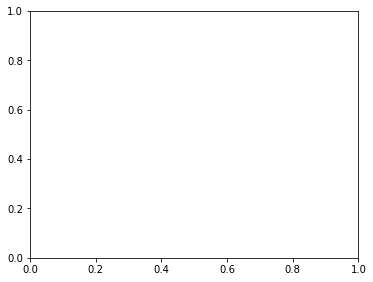

In [10]:
plt.figure(figsize=(20, 10))
for i, column in enumerate(obj_df.columns[list(range(1, obj_df.shape[1]))], 1):
    plt.subplot(2, 3, i)
    count = Counter(df[column])
    plt.pie(count.values(), labels=count.keys(), autopct=lambda p:f'{p:.2f}%')
    plt.title(column)

In [ ]:
catvars_nums = {"Attrition_Flag": {"Existing Customer": 0, "Attrited Customer": 1},
                "Gender": {"M": 0, "F": 1},
                "Education_Level": {"Unknown": 0, "Uneducated": 1, "High School": 2, "College": 3,
                                  "Graduate": 4, "Post-Graduate": 5, "Doctorate": 6},
                "Marital_Status": {"Unknown": 0, "Single": 1, "Married": 2, "Divorced": 3},
                "Income_Category": {"Unknown": 0, "Less than $40K": 1, "$40K - $60K": 2, "$60K - $80K": 3,
                                  "$80K - $120K": 2, "$120K +": 3},
                "Card_Category": {"Blue": 1, "Silver": 2, "Gold": 3, "Platinum": 4}
               }

In [ ]:
obj_df = obj_df.replace(catvars_nums)
obj_df.head()

In [ ]:
df.replace(catvars_nums,inplace=True)
df.head()

In [ ]:
df.shape[1]/3

In [ ]:
plt.figure(figsize=(20, 30))

for i, column in enumerate(df.columns[list(range(1, df.shape[1]))], 1):
    plt.subplot(7, 3, i)
    df[df["Attrition_Flag"] == 1][column].hist(bins=35, color='blue', label ='churned = YES', alpha=0.6)
    df[df["Attrition_Flag"] == 0][column].hist(bins=35, color='red', label ='churned = NO', alpha=0.6)
    plt.legend()
    plt.xlabel(column)

In [ ]:
#plt.figure(figsize=(30, 30))
#sns.pairplot(df, hue='Attrition_Flag', height=3, diag_kind='hist')

-----

# Model Preparation

In [ ]:
#Variables that we use to make the prediction in our model
Feature = df.drop(['Attrition_Flag'], axis=1)
Feature.head()

In [ ]:
# Standardizing the parametres
from sklearn import preprocessing
X= preprocessing.StandardScaler().fit(Feature).transform(Feature)
X[0:5]

In [ ]:
# Target variable
y = df['Attrition_Flag'].values
y[0:5]

In [ ]:
#inputs for the models
rand_state=13
n_est=1000
t_size=0.10

In [ ]:
# Splitting the data two samples, training (90 %) and test (10 %) datasets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=t_size, random_state=rand_state)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

# Bagging Algoritms

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, classification_report
#from sklearn.metrics import recall_score


def evaluate(model, X_train, X_test, y_train, y_test):
    y_test_pred = model.predict(X_test)
    y_train_pred = model.predict(X_train)

    print("TRAINIG RESULTS: \n===============================")
    clf_report = pd.DataFrame(classification_report(y_train, y_train_pred, output_dict=True))
    print(f"CONFUSION MATRIX:\n{confusion_matrix(y_train, y_train_pred)}")
    print(f"ACCURACY SCORE:\n{accuracy_score(y_train, y_train_pred):.4f}")
    print(f"CLASSIFICATION REPORT:\n{clf_report}")

    print("TESTING RESULTS: \n===============================")
    clf_report = pd.DataFrame(classification_report(y_test, y_test_pred, output_dict=True))
    print(f"CONFUSION MATRIX:\n{confusion_matrix(y_test, y_test_pred)}")
    print(f"ACCURACY SCORE:\n{accuracy_score(y_test, y_test_pred):.4f}")
    print(f"CLASSIFICATION REPORT:\n{clf_report}")


-----

## Decision Tree

In [ ]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier()
bagging_clf = BaggingClassifier(base_estimator=tree, n_estimators=n_est, random_state=rand_state)
bagging_clf.fit(X_train, y_train)

evaluate(bagging_clf, X_train, X_test, y_train, y_test)

In [ ]:
scores = {
    'Bagging Classifier': {
        'Train': recall_score(y_train, bagging_clf.predict(X_train)),
        'Test': recall_score(y_test, bagging_clf.predict(X_test)),
    },
}

In [ ]:
recall_score(y_test, bagging_clf.predict(X_test))

In [ ]:
scores

-----

## Random Forrest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(random_state=rand_state, n_estimators=n_est)
rf_clf.fit(X_train, y_train)
evaluate(rf_clf, X_train, X_test, y_train, y_test)

In [ ]:
scores['Random Forest'] = {
        'Train': recall_score(y_train, rf_clf.predict(X_train)),
        'Test': recall_score(y_test, rf_clf.predict(X_test)),
    }

In [ ]:
scores

-----

## Extra Trees

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier

ex_tree_clf = ExtraTreesClassifier(n_estimators=n_est, max_features=7, random_state=rand_state)
ex_tree_clf.fit(X_train, y_train)
evaluate(ex_tree_clf, X_train, X_test, y_train, y_test)

In [ ]:
scores['Extra Tree'] = {
        'Train': recall_score(y_train, ex_tree_clf.predict(X_train)),
        'Test': recall_score(y_test, ex_tree_clf.predict(X_test)),
    }

In [ ]:
scores

-------

# Boosting Algoritms

## AdaBoost

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

ada_boost_clf = AdaBoostClassifier(n_estimators=n_est)
ada_boost_clf.fit(X_train, y_train)
evaluate(ada_boost_clf, X_train, X_test, y_train, y_test)

In [ ]:
scores['AdaBoost'] = {
        'Train': recall_score(y_train, ada_boost_clf.predict(X_train)),
        'Test': recall_score(y_test, ada_boost_clf.predict(X_test)),
    }

In [ ]:
scores

-----

## Stochastic Gradient Boosting

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

grad_boost_clf = GradientBoostingClassifier(n_estimators=n_est, random_state=rand_state)
grad_boost_clf.fit(X_train, y_train)
evaluate(grad_boost_clf, X_train, X_test, y_train, y_test)

In [ ]:
scores['Gradient Boosting'] = {
        'Train': recall_score(y_train, grad_boost_clf.predict(X_train)),
        'Test': recall_score(y_test, grad_boost_clf.predict(X_test)),
    }

In [ ]:
scores

-----

# Voting Ensemble

In [ ]:
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

estimators = []
log_reg = LogisticRegression(solver='liblinear')
estimators.append(('Logistic', log_reg))

tree = DecisionTreeClassifier()
estimators.append(('Tree', tree))

svm_clf = SVC(gamma='scale')
estimators.append(('SVM', svm_clf))

voting = VotingClassifier(estimators=estimators)
voting.fit(X_train, y_train)

evaluate(voting, X_train, X_test, y_train, y_test)

In [ ]:
estimators

In [ ]:
scores['Voting'] = {
        'Train': recall_score(y_train, voting.predict(X_train)),
        'Test': recall_score(y_test, voting.predict(X_test)),
    }

----

# Results

In [ ]:
scores_df = pd.DataFrame(scores)

scores_df.plot(kind='barh', figsize=(15, 8))

## Authors:

### Daniel Molnar & Vanessa Koch

In [ ]:
scores_df 